In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [1]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

In [2]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

In [3]:
noise_model = get_noise(0.01,0.01)

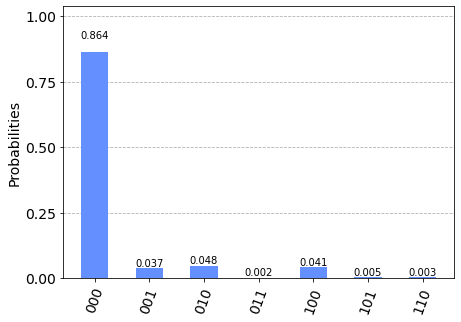

In [28]:
qc0 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc0.measure_all() # measure the qubits

# run the circuit with the noise model and extract the counts
qobj = assemble(qc0)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

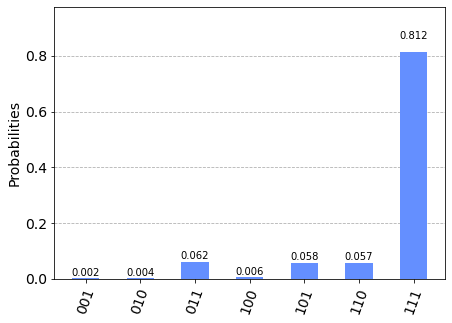

In [29]:
qc1 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc1.x([0,1,2]) # flip each 0 to 1

qc1.measure_all() # measure the qubits

# run the circuit with th noise model and extract the counts
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

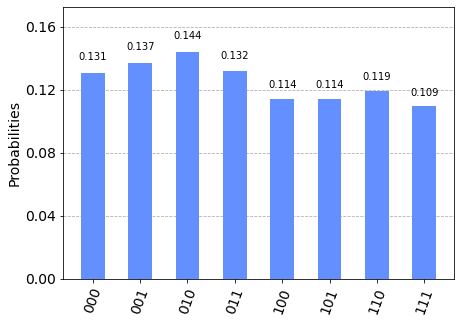

In [7]:
noise_model = get_noise(0.5,0.0)
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()
plot_histogram(counts)

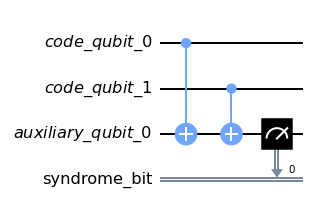

In [30]:
cq = QuantumRegister(2, 'code_qubit')
lq = QuantumRegister(1, 'auxiliary_qubit')
sb = ClassicalRegister(1, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw()

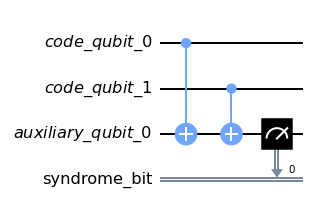

In [31]:
qc_init = QuantumCircuit(cq)
qc.compose(qc_init).draw()

In [32]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


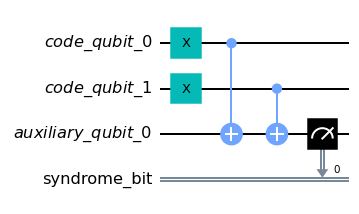

In [41]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq)
qc.compose(qc_init, front=True).draw()

In [42]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:', counts)

Results: {'0': 1024}


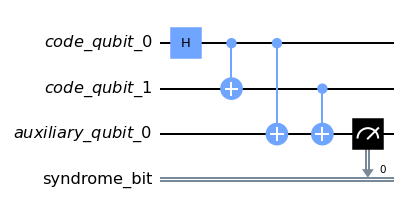

In [43]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0], cq[1])
qc.compose(qc_init, front=True).draw()

In [44]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


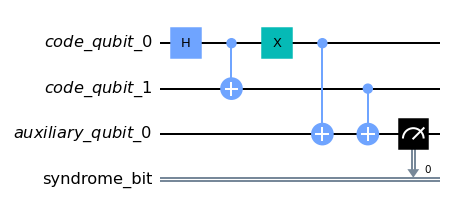

In [45]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0], cq[1])
qc_init.x(cq[0])
qc.compose(qc_init, front=True).draw()

In [46]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:',counts)

Results: {'1': 1024}


In [17]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import lookuptable_decoding
from qiskit.ignis.verification.topological_codes import GraphDecoder

In [18]:
n = 3
T = 1
code = RepetitionCode(n, T)

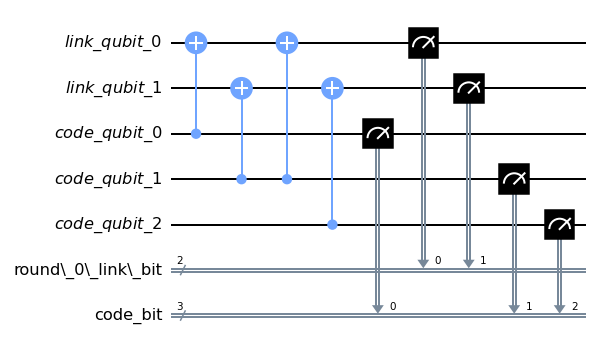

In [19]:
code.circuit['0'].draw()

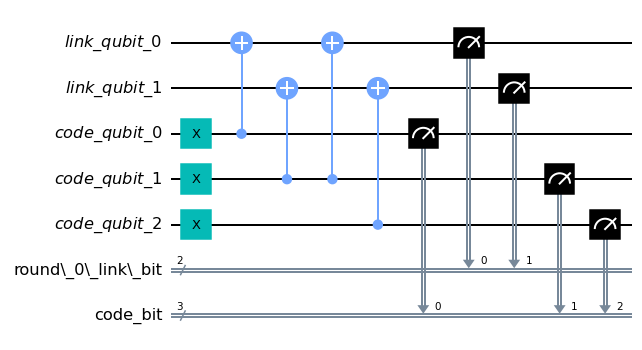

In [20]:
code.circuit['1'].draw()

In [21]:
def get_raw_results(code,noise_model=None):
    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        qobj = assemble(circuits[log])
        job = aer_sim.run(qobj, noise_model=noise_model)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log, ':', raw_results[log], '\n')

Logical 0 : {'000 00': 1024} 

Logical 1 : {'111 00': 1024} 



In [22]:
code = RepetitionCode(n,4)

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

Logical 0 : {'000 00 00 00 00': 1024} 

Logical 1 : {'111 00 00 00 00': 1024} 



In [23]:
code = RepetitionCode(5,4)

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

Logical 0 : {'00000 0000 0000 0000 0000': 1024} 

Logical 1 : {'11111 0000 0000 0000 0000': 1024} 



In [24]:
code = RepetitionCode(3,1)

noise_model = get_noise(0.05,0.05)

raw_results = get_raw_results(code,noise_model)
for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

Logical 0 : {'110 01': 1, '111 00': 1, '001 11': 2, '011 01': 1, '000 01': 76, '001 01': 6, '010 01': 24, '001 10': 7, '000 10': 74, '100 00': 52, '101 00': 3, '000 00': 641, '001 00': 49, '000 11': 13, '110 00': 3, '010 00': 45, '101 10': 1, '100 10': 5, '010 10': 4, '100 01': 9, '011 10': 2, '011 00': 5} 

Logical 1 : {'011 11': 3, '110 11': 1, '000 01': 1, '011 01': 4, '110 10': 7, '001 11': 3, '001 00': 4, '110 01': 18, '010 01': 2, '001 01': 3, '011 00': 59, '111 00': 581, '111 10': 69, '101 00': 48, '111 01': 65, '010 10': 3, '100 01': 7, '011 10': 26, '010 00': 3, '100 10': 2, '101 10': 6, '111 11': 9, '100 00': 2, '101 01': 28, '110 00': 49, '101 11': 18, '001 10': 3} 



In [25]:
circuits = code.get_circuit_list()
table_results = {}
for log in range(2):
    qobj = assemble(circuits[log], shots=10000)
    job = aer_sim.run(qobj, noise_model=noise_model)
    table_results[str(log)] = job.result().get_counts(str(log))

In [26]:
P = lookuptable_decoding(table_results,raw_results)
print('P =',P)

P = {'0': 0.0185546875, '1': 0.029296875}


In [27]:
code = RepetitionCode(3,2)

raw_results = get_raw_results(code,noise_model)

results = code.process_results( raw_results )

for log in ['0','1']:
    print('\nLogical ' + log + ':')
    print('raw results       ', {string:raw_results[log][string] for string in raw_results[log] if raw_results[log][string]>=50 })
    print('processed results ', {string:results[log][string] for string in results[log] if results[log][string]>=50 })


Logical 0:
raw results        {'000 00 10': 50, '000 00 00': 506, '000 01 00': 52}
processed results  {'0 0  10 10 00': 50, '0 0  00 00 00': 506, '0 0  00 01 01': 52}

Logical 1:
raw results        {'111 10 00': 50, '111 00 00': 429}
processed results  {'1 1  00 10 10': 50, '1 1  00 00 00': 429}
